# Import Library

In [928]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

# Load Data

In [943]:
dataset = pd.read_csv('cemara_dataset.csv')
dataset = dataset.drop(['Timestamp'], axis=1)
dataset.tail()

,Peran,Umur,Minat,Minat1,Minat2,Keahlian,Keahlian1,Aktivitas
282,Anak,15<,Olahraga,Alam,Binatang,Berkebun,NaN,Mencuci Piring
283,Anak,21-55,Makanan,Hiburan,Edukasi,Sosialisasi,NaN,Membersihkan Rumah
284,Ibu,21-55,Makanan,Hiburan,Keuangan,Masak,Berkebun,Memasak
285,Ayah,21-55,Teknologi,Hiburan,Edukasi,Otomotif,Kelistrikan,Memperbaiki Rumah/Kelistrikan/Perabotan
286,Anak,15<,Makanan,Teknologi,Hiburan,Masak,Manajemen,Memasak


In [930]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Peran      287 non-null    object
 1   Umur       287 non-null    object
 2   Minat      287 non-null    object
 3   Minat1     287 non-null    object
 4   Minat2     287 non-null    object
 5   Keahlian   287 non-null    object
 6   Keahlian1  222 non-null    object
 7   Aktivitas  287 non-null    object
dtypes: object(8)
memory usage: 18.1+ KB


# Data Preprocessing

In [931]:
dataset.isna().sum()

Peran         0
Umur          0
Minat         0
Minat1        0
Minat2        0
Keahlian      0
Keahlian1    65
Aktivitas     0
dtype: int64

In [945]:
dataset = dataset.dropna()
dataset.tail()

,Peran,Umur,Minat,Minat1,Minat2,Keahlian,Keahlian1,Aktivitas
279,Ibu,21-55,Makanan,Edukasi,Keuangan,Masak,Manajemen,Belanja Kebutuhan
281,Ibu,21-55,Olahraga,Alam,Kesehatan,Masak,Manajemen,Memasak
284,Ibu,21-55,Makanan,Hiburan,Keuangan,Masak,Berkebun,Memasak
285,Ayah,21-55,Teknologi,Hiburan,Edukasi,Otomotif,Kelistrikan,Memperbaiki Rumah/Kelistrikan/Perabotan
286,Anak,15<,Makanan,Teknologi,Hiburan,Masak,Manajemen,Memasak


# Split data to training and test sets

In [933]:
x = dataset.drop(['Aktivitas'], axis=1)
y = dataset['Aktivitas']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x = pd.get_dummies(x)
y = le.fit_transform(y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=10)

x.loc[:,]

,Peran_Anak,Peran_Ayah,Peran_Ibu,Umur_15-20,Umur_15<,Umur_21-55,Umur_>55,Minat_Alam,Minat_Binatang,Minat_Edukasi,...,Keahlian_Masak,Keahlian_Otomotif,Keahlian_Sosialisasi,Keahlian_Swakarya/DIY,Keahlian1_Berkebun,Keahlian1_Kelistrikan,Keahlian1_Manajemen,Keahlian1_Otomotif,Keahlian1_Sosialisasi,Keahlian1_Swakarya/DIY
0,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
5,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
281,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
284,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
285,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [934]:
list(le.classes_)

['Belanja Kebutuhan',
 'Memasak',
 'Membayar Tagihan',
 'Membersihkan Rumah',
 'Memperbaiki Rumah/Kelistrikan/Perabotan',
 'Mencuci Baju',
 'Mencuci Piring',
 'Mengasuh Anak']

# Define a Model

In [935]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(45, activation='relu', input_shape=(45,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                loss='mse', 
                metrics=['mae'])

In [936]:
model.summary()

Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_210 (Dense)           (None, 45)                2070      
                                                                 
 dense_211 (Dense)           (None, 100)               4600      
                                                                 
 dense_212 (Dense)           (None, 100)               10100     
                                                                 
 dense_213 (Dense)           (None, 1)                 101       
                                                                 
Total params: 16,871
Trainable params: 16,871
Non-trainable params: 0
_________________________________________________________________


In [937]:
history = model.fit(x_train, y_train, epochs=100, verbose=0, validation_split=0.2)

In [938]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,val_loss,val_mae,epoch
95,3.860841,1.603244,2.759758,1.385396,95
96,3.851880,1.600518,2.758982,1.385248,96
97,3.851551,1.600134,2.748492,1.382300,97
98,3.845384,1.597796,2.742879,1.380736,98
99,3.842242,1.596805,2.743191,1.380883,99


## Define history plot

In [939]:
def plot_loss(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    accuracy = history_dict['mae']
    val_accuracy = history_dict['val_mae']
    
    epochs = range(1, len(loss_values) + 1)
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    #
    # Plot the model accuracy (MAE) vs Epochs
    #
    ax[0].plot(epochs, accuracy, label='Training accuracy')
    ax[0].plot(epochs, val_accuracy, label='Validation accuracy')
    ax[0].set_title('Training & Validation Accuracy', fontsize=16)
    ax[0].set_xlabel('Epochs', fontsize=16)
    ax[0].set_ylabel('Accuracy', fontsize=16)
    ax[0].legend()
    #
    # Plot the loss vs Epochs
    #
    ax[1].plot(epochs, loss_values, label='Training loss')
    ax[1].plot(epochs, val_loss_values, label='Validation loss')
    ax[1].set_title('Training & Validation Loss', fontsize=16)
    ax[1].set_xlabel('Epochs', fontsize=16)
    ax[1].set_ylabel('Loss', fontsize=16)
    ax[1].legend()

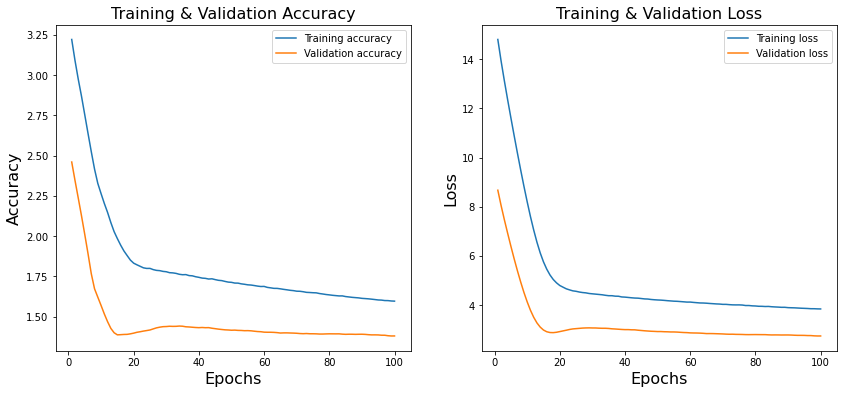

In [940]:
plot_loss(history)

# Export Model

In [941]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model, './tfjs')

In [948]:
test = model.predict(x_test[:20])
print(test)

1/1 [==============================] - 0s 31ms/step
[[3.172]
 [3.552]
 [3.212]
 [3.255]
 [3.154]
 [3.225]
 [2.946]
 [2.952]
 [3.423]
 [2.834]
 [3.025]
 [2.47 ]
 [2.71 ]
 [2.905]
 [2.52 ]
 [2.504]
 [3.104]
 [3.735]
 [2.952]
 [2.726]]
